# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

# Importando dados e bibliotecas

## Importando principais bibliotecas e os dados

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 60%, 20% e 20%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino e validação serão treinados separadamente nos objetos ``sm_train`` e ``sm_val`` derivados da classe ``SMOTE`` do pacote ``imblearn.over_sampling``.

Neste caso também utilizamos somente

In [3]:
from imblearn.over_sampling import SMOTE


# Features selecionadas na parte 2 dos testes (Aprendizagem Supervisionada)
features_selected = [4, 12, 14]

# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]

X = X[:,features_selected]



from imblearn.over_sampling import SMOTE



# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 60%-20%-20%
train_size_nf = int(n_examples_nf*0.6)
val_size_nf = int(n_examples_nf*0.2)
test_size_nf = n_examples_nf - train_size_nf - val_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_val,y_nf_val = X_nf[train_size_nf:train_size_nf+val_size_nf],y_nf[train_size_nf:train_size_nf+val_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf+val_size_nf:],y_nf[train_size_nf+val_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 60%-20%-20%
train_size_f = int(n_examples_f*0.6)
val_size_f = int(n_examples_f*0.2)
test_size_f = n_examples_f - train_size_f - val_size_f


# Separando em dados de treino-teste-validação
X_f_train,y_f_train = X_f[:train_size_f],y_f[:train_size_f]
X_f_val,y_f_val = X_f[train_size_f:train_size_f+val_size_f],y_f[train_size_f:train_size_f+val_size_f]
X_f_test,y_f_test = X_f[train_size_f+val_size_f:],y_f[train_size_f+val_size_f:]




# Concatenando os dados rebalanceados

X_train = np.concatenate((X_f_train,X_nf_train),axis=0)
y_train = np.concatenate((y_f_train,y_nf_train),axis=0)


X_val = np.concatenate((X_f_val,X_nf_val),axis=0)
y_val = np.concatenate((y_f_val,y_nf_val),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_train = SMOTE(sampling_strategy='minority',random_state=42)
sm_val = SMOTE(sampling_strategy='minority',random_state=42)

X_train,y_train = sm_train.fit_resample(X_train,y_train)
X_val,y_val = sm_val.fit_resample(X_val,y_val)

y_train = np.expand_dims(y_train,1)
y_val = np.expand_dims(y_val,1)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)
n_examples = train_size + val_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]


np.random.seed(101)
index_shuffling_val = list(range(val_size))
np.random.shuffle(index_shuffling_val)
np.random.seed(None)

X_val,y_val = X_val[index_shuffling_val],y_val[index_shuffling_val]


In [39]:
from sklearn.preprocessing import MinMaxScaler


sc_X = MinMaxScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_val_sc = sc_X.fit_transform(X_val)
X_test_sc = sc_X.transform(X_test)
X_nf_train_sc = sc_X.transform(X_nf_train)
X_nf_val_sc = sc_X.transform(X_nf_val)
X_nf_test_sc = sc_X.transform(X_nf_test)

In [40]:
import torch
import torch.nn as nn




device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

trainX,valX,testX = torch.tensor(X_nf_train_sc),torch.tensor(X_nf_val_sc),torch.tensor(X_nf_test_sc)
trainX,valX,testX = trainX,valX,testX
trainX,valX,testX = trainX.type(torch.float),valX.type(torch.float),testX.type(torch.float)



trainX,valX,testX = trainX.to(device),valX.to(device),testX.to(device)

cpu


In [52]:
from tqdm import tqdm





n_features = X_train_sc.shape[1]

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.num_channels_encode = [20,10]
        self.num_channels_out_decode = [20,n_features]
        

        self.n_features = n_features
        

        
        
        self.layer1 =  nn.Sequential(nn.Linear(n_features,self.num_channels_encode[0]),
                        nn.BatchNorm1d(self.num_channels_encode[0]),
                        nn.GELU(),
                        nn.Dropout(0.2))

        self.layer2 =  nn.Sequential(nn.Linear(self.num_channels_encode[0],self.num_channels_encode[1]),
                        nn.BatchNorm1d(self.num_channels_encode[1]),
                        nn.GELU(),
                        nn.Dropout(0.35))

        self.layer3 =  nn.Sequential(nn.Linear(self.num_channels_encode[1],self.num_channels_out_decode[0]),
                        nn.BatchNorm1d(self.num_channels_out_decode[0]),
                        nn.GELU(),
                        nn.Dropout(0.35))

        self.layer4 =  nn.Sequential(nn.Linear(self.num_channels_out_decode[0],self.num_channels_out_decode[1]),
                        nn.BatchNorm1d(self.num_channels_out_decode[1]),
                        nn.GELU(),
                        nn.Dropout(0.35))



        self.fc = nn.Linear(self.num_channels_out_decode[1], self.n_features)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.fc(out)
        return out

In [53]:
def train(model, optimizer, loss_f, num_epochs, batch_size, data_train_x, data_train_y, data_val_x, data_val_y):
    list_loss= []
    list_time = []
    valid_loss = []
    avg_valid_losses = []

    val_size = len(data_val_y)


        
        
    j = 0
    m = len(data_train_y)
    num_batches = m//batch_size + 1 if m%batch_size>0 else m//batch_size

    alpha = .90
    exponential_decay_loss = []
    index = np.random.choice(range(val_size),size=2*batch_size)
    data = data_val_x[index] # Preditores
    target = data_val_y[index] # Labels
    data = data.to(device)
    target = target.to(device)
    model.eval()
    with torch.no_grad():
        loss = loss_f(model(data),target)
    exponential_decay_loss.append(loss.item())
    for epoch in tqdm(range(num_epochs)):
      for i in range(num_batches):
            model.train()
            X_batch = data_train_x[i*batch_size:(i+1)*batch_size]
            y_batch = data_train_y[i*batch_size:(i+1)*batch_size]
            outputs = model(X_batch)
            loss = loss_f(outputs, y_batch)
     
            # l1_lambda = 1e-4
            # l1_norm = sum(p.abs().sum()
            #               for p in model.parameters())

            # loss = loss + l1_lambda * l1_norm

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            list_loss.append(loss.item())
            list_time.append(i)


            model.eval() # prep model for evaluation
            # Utilizando o mesmo processo nos dados de validação
            index = np.random.choice(range(val_size),size=2*batch_size)
            data = data_val_x[index] # Preditores
            target = data_val_y[index] # Labels
            
            
            data = data.to(device)
            target = target.to(device)
            
            with torch.no_grad():
                outputs = model(data)
                
                loss = loss_f(outputs, target)
            
            # l1_norm = sum(p.abs().sum()
                          # for p in model.parameters())

            # loss = loss + l1_lambda * l1_norm


            valid_loss = loss.item()
            avg_valid_losses.append(valid_loss)
            
            exponential_decay_loss.append(alpha*exponential_decay_loss[-1] + (1-alpha)*valid_loss)


            if j % 400*num_batches == 0:
                print("\nIteration: [%d/%d], loss: %1.4E" % (j,num_batches*num_epochs, exponential_decay_loss[-1]))
            j += 1
    
    print('Finished Training Trainset')

    fig=plt.figure(figsize=(12,8))

    ax=fig.add_axes([.1,.1,.85,.85])

    ax.plot(list_loss,c='#0F5CFE',label='Train Loss')
    ax.plot(exponential_decay_loss,c='#6C1AD9',label='Smoothed Val. Loss')
    ax.set_yscale('log')
    plt.legend()
    plt.show()
    print('Train Loss: %1.4E'% list_loss[-1])
    print('Smoothed Validation Loss: %1.4E'% exponential_decay_loss[-1])
    return [exponential_decay_loss,list_loss]

  0%|          | 0/31 [00:00<?, ?it/s]


Iteration: [0/5177], loss: 3.1791E-01


  6%|▋         | 2/31 [00:08<02:09,  4.48s/it]


Iteration: [400/5177], loss: 2.2108E-02


 13%|█▎        | 4/31 [00:18<02:02,  4.54s/it]


Iteration: [800/5177], loss: 2.2389E-02


 23%|██▎       | 7/31 [00:31<01:46,  4.43s/it]


Iteration: [1200/5177], loss: 2.2453E-02


 29%|██▉       | 9/31 [00:41<01:42,  4.67s/it]


Iteration: [1600/5177], loss: 2.1822E-02


 39%|███▊      | 12/31 [00:56<01:32,  4.87s/it]


Iteration: [2000/5177], loss: 2.2263E-02


 45%|████▌     | 14/31 [01:05<01:20,  4.75s/it]


Iteration: [2400/5177], loss: 2.3115E-02


 52%|█████▏    | 16/31 [01:15<01:13,  4.90s/it]


Iteration: [2800/5177], loss: 2.2679E-02


 61%|██████▏   | 19/31 [01:30<00:59,  4.93s/it]


Iteration: [3200/5177], loss: 2.2628E-02


 68%|██████▊   | 21/31 [01:39<00:47,  4.76s/it]


Iteration: [3600/5177], loss: 2.2023E-02


 77%|███████▋  | 24/31 [01:53<00:32,  4.68s/it]


Iteration: [4000/5177], loss: 2.2144E-02


 84%|████████▍ | 26/31 [02:02<00:23,  4.67s/it]


Iteration: [4400/5177], loss: 2.2708E-02


 90%|█████████ | 28/31 [02:11<00:13,  4.60s/it]


Iteration: [4800/5177], loss: 2.2227E-02


100%|██████████| 31/31 [02:25<00:00,  4.69s/it]


Finished Training Trainset


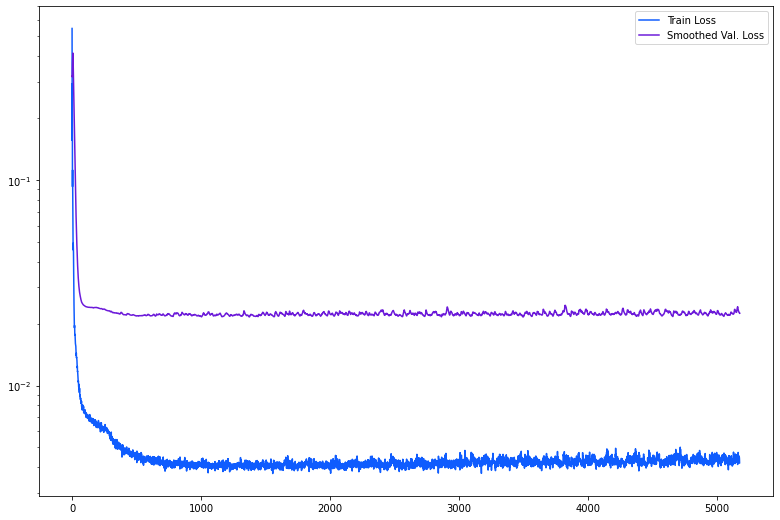

Train Loss: 4.2055E-03
Smoothed Validation Loss: 2.2470E-02


In [54]:
batch_size = 2048
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

np.random.seed(102)
model = Autoencoder()

model = model.to(device)

loss_function = torch.nn.MSELoss()
# Hiperparametros
learning_rate = 1e-1
num_epochs = 31

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)

[exponential_decay_loss,list_loss] = train(model, optimizer, loss_function, num_epochs, batch_size, trainX, trainX, valX, valX)



  0%|          | 0/11 [00:00<?, ?it/s]


Iteration: [0/1837], loss: 2.1425E-02


 18%|█▊        | 2/11 [00:09<00:42,  4.75s/it]


Iteration: [400/1837], loss: 2.2178E-02


 36%|███▋      | 4/11 [00:19<00:33,  4.80s/it]


Iteration: [800/1837], loss: 2.3589E-02


 64%|██████▎   | 7/11 [00:33<00:18,  4.65s/it]


Iteration: [1200/1837], loss: 2.2429E-02


 82%|████████▏ | 9/11 [00:40<00:08,  4.26s/it]


Iteration: [1600/1837], loss: 2.2528E-02


100%|██████████| 11/11 [00:49<00:00,  4.46s/it]


Finished Training Trainset


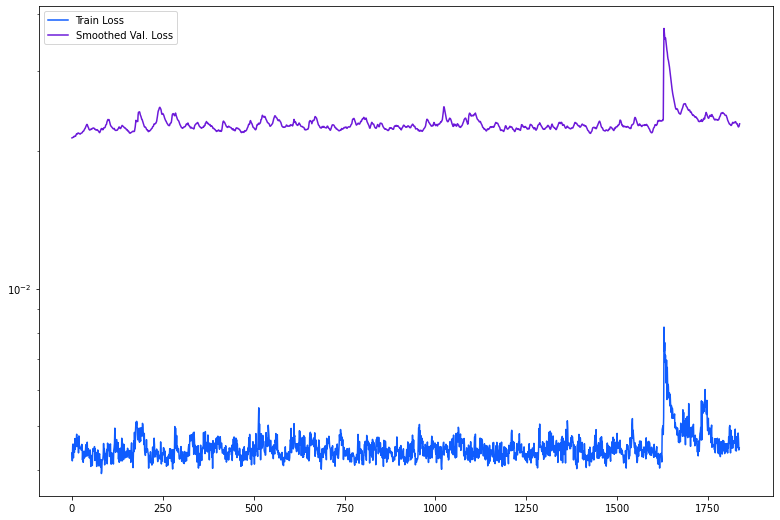

Train Loss: 4.4680E-03
Smoothed Validation Loss: 2.2985E-02


In [55]:
model.layer1[2].p = 0.0
model.layer2[2].p = 0.0
model.layer3[2].p = 0.0
model.layer4[2].p = 0.0
learning_rate = 1e-1
num_epochs = 11

[exponential_decay_loss,list_loss] = train(model, optimizer, loss_function, num_epochs, batch_size, trainX, trainX, valX, valX)


# torch.manual_seed(None)
np.random.seed(None)


In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


testX_autoencoder = model(testX)

testX_autoencoder_numpy = testX_autoencoder.cpu().detach().numpy()

testX_numpy = testX.cpu().detach().numpy()


MSE = mean_squared_error(testX_numpy.ravel(),testX_autoencoder_numpy.ravel())
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(testX_numpy.ravel(),testX_autoencoder_numpy.ravel())

print("Test MSE loss: %1.4e"%MSE)
print("Test RMSE loss: %1.4e"%RMSE)
print("Test MAE loss: %1.4e"%MAE)

Test MSE loss: 2.3651e-02
Test RMSE loss: 1.5379e-01
Test MAE loss: 1.1062e-01


In [57]:
PATH = 'autoencoder.ptc'
final_model = model.to('cpu')
torch.save(final_model.state_dict(), PATH)
model = model.to(device)

In [58]:
from sklearn.preprocessing import MinMaxScaler


sc_X = MinMaxScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_val_sc = sc_X.fit_transform(X_val)
X_test_sc = sc_X.transform(X_test)

In [59]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

trainX,valX,testX = torch.tensor(X_train_sc),torch.tensor(X_val_sc),torch.tensor(X_test_sc)
trainX,valX,testX = trainX,valX,testX
trainX,valX,testX = trainX.type(torch.float),valX.type(torch.float),testX.type(torch.float)


trainY,valY,testY = torch.tensor(y_train).squeeze(1),torch.tensor(y_val).squeeze(1),torch.tensor(y_test).squeeze(1)
trainY,valY,testY = trainY.type(torch.LongTensor),valY.type(torch.LongTensor),testY.type(torch.LongTensor)


trainX,valX,testX = trainX.to(device),valX.to(device),testX.to(device)
trainY,valY,testY = trainY.to(device),valY.to(device),testY.to(device)

cpu


In [60]:
trainX_autoencoder = model(trainX)
trainX_autoencoder = trainX_autoencoder

testX_autoencoder = model(testX)
testX_autoencoder = testX_autoencoder

print(valX)
valX_autoencoder = model(valX)
valX_autoencoder = valX_autoencoder
print(valX_autoencoder)
X_val_sc_pred = valX_autoencoder.cpu().data.numpy()


trainX_autoencoder,testX_autoencoder,valX_autoencoder = trainX_autoencoder.to(device),testX_autoencoder.to(device),valX_autoencoder.to(device)

tensor([[4.1127e-01, 9.0991e-01, 7.3297e-01,  ..., 2.4332e-01, 4.9642e-01,
         2.5036e-02],
        [1.9960e-01, 9.6688e-01, 7.1969e-01,  ..., 2.3748e-01, 4.9390e-01,
         1.0233e-02],
        [6.6131e-02, 8.9096e-01, 8.1064e-01,  ..., 2.8462e-01, 5.1896e-01,
         3.8924e-05],
        ...,
        [3.9303e-01, 8.7509e-01, 7.5178e-01,  ..., 2.4431e-01, 4.9996e-01,
         1.0310e-02],
        [1.0451e-01, 7.0927e-01, 7.8415e-01,  ..., 3.1011e-01, 4.6891e-01,
         4.6274e-02],
        [4.1719e-01, 9.7446e-01, 7.4065e-01,  ..., 2.3884e-01, 4.9398e-01,
         2.4320e-03]])
tensor([[0.3290, 0.9280, 0.7754,  ..., 0.6585, 0.2574, 0.0119],
        [0.2600, 0.9269, 0.7739,  ..., 0.6599, 0.2559, 0.0116],
        [0.1723, 0.7476, 0.8497,  ..., 0.6615, 0.2696, 0.0093],
        ...,
        [0.3250, 0.9355, 0.7714,  ..., 0.6581, 0.2560, 0.0116],
        [0.1568, 0.7328, 0.8544,  ..., 0.6614, 0.2692, 0.0086],
        [0.3278, 0.9417, 0.7683,  ..., 0.6576, 0.2550, 0.0114]],
      

In [82]:
torch.tensor([0.95])

tensor([0.9500])

In [88]:
threshold = np.quantile(MSETest[y_test.ravel()==0],q=0.95)

In [96]:
y_test_pred = (MSETest>=threshold).astype(int)

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     56863
         1.0       0.01      0.34      0.02        99

    accuracy                           0.95     56962
   macro avg       0.51      0.65      0.50     56962
weighted avg       1.00      0.95      0.97     56962



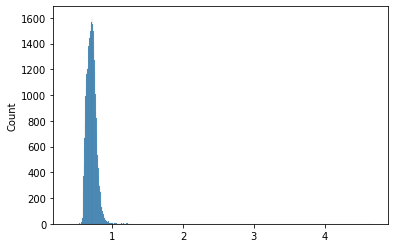

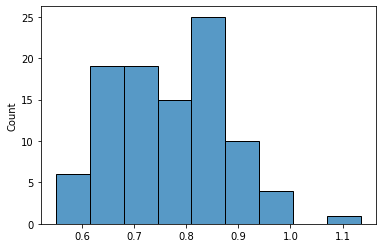

In [78]:
MSETest = torch.sum((testX_autoencoder - testX)**2,1).data.numpy()

sns.histplot(MSETest[y_test.ravel()==0])
plt.show()

sns.histplot(MSETest[y_test.ravel()==1])
plt.show()

In [61]:
valX_autoencoder.shape

torch.Size([113726, 30])

In [16]:
from tqdm import tqdm


n_features = X_train_sc.shape[1]


def convolution_size(initial_size,kernel,padding,stride):
  final_size = int((initial_size-kernel+2*padding)/(stride)) + 1
  # final_size = int((initial_size-kernel+2*padding)/(2*stride)) + 1
  return final_size

class Classification_NN(nn.Module):
    def __init__(self,n_features):
        super(Classification_NN, self).__init__()

        self.input_sizes = [n_features,2*n_features,4*n_features,4*n_features,2*n_features]
        self.output_sizes = self.input_sizes[1:]
        self.output_sizes.append(2)
        self.n_features = n_features

        print('input:',self.input_sizes)
        print('output:',self.output_sizes)

        
        self.layer0 = nn.Sequential(nn.Linear(self.input_sizes[0],self.output_sizes[0]),
                        nn.BatchNorm1d(self.output_sizes[0]),
                        nn.GELU(),
                        nn.Dropout(0.25))


        self.layer1 = nn.Sequential(nn.Linear(self.input_sizes[1],self.output_sizes[1]),
                        nn.BatchNorm1d(self.output_sizes[1]),
                        nn.GELU(),
                        nn.Dropout(0.25))


        self.layer2 = nn.Sequential(nn.Linear(self.input_sizes[2],self.output_sizes[2]),
                        nn.BatchNorm1d(self.output_sizes[2]),
                        nn.GELU(),
                        nn.Dropout(0.25))


        self.layer3 = nn.Sequential(nn.Linear(self.input_sizes[3],self.output_sizes[3]),
                        nn.BatchNorm1d(self.output_sizes[3]),
                        nn.GELU(),
                        nn.Dropout(0.25))


        self.layer4 = nn.Sequential(nn.Linear(self.input_sizes[4],self.output_sizes[4]),
                        nn.BatchNorm1d(self.output_sizes[4]),
                        nn.GELU(),
                        nn.Dropout(0.25))
        

        # self.fc = nn.Linear(self.output_sizes[4], 2)


    def forward(self, x):
        # out = Variable(x,requires_grad=True)
        out = self.layer0(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        # out = self.fc(out)
        return out

In [17]:
from sklearn.metrics import balanced_accuracy_score
def train(model, optimizer, loss_f, num_epochs, batch_size, data_train_x, data_train_y, data_val_x, data_val_y):
    list_loss= []
    list_time = []
    valid_loss = []
    valid_losses = []
    avg_valid_losses = []

    val_size = len(data_val_y)
    val_batch_size = 2*batch_size

        
        
    j = 0
    m = len(data_train_y)
    num_batches = m//batch_size + 1 if m%batch_size>0 else m//batch_size

    alpha = .90
    exponential_decay_loss = []
    exponential_balanced_accuracy = []
    index = np.random.choice(range(m),size=batch_size,replace=False)
    data = data_train_x[index] # Preditores
    target = data_train_y[index] # Labels

    model.eval()
    outputs = model(data)
    

    # print(outputs.shape)
    # print(target.shape)
    loss = loss_f(outputs, target)
    predict = outputs.argmax(axis=1)
    predict_numpy = predict.cpu().data.numpy()
    target_numpy = target.cpu().data.numpy()
    

    balanced_accuracy = balanced_accuracy_score(target_numpy,predict_numpy)
    exponential_decay_loss.append(loss.item())
    exponential_balanced_accuracy.append(balanced_accuracy)
    for epoch in tqdm(range(num_epochs)):
      for i in tqdm(range(num_batches), leave=False):
            X_batch = data_train_x[i*batch_size:(i+1)*batch_size]
            y_batch = data_train_y[i*batch_size:(i+1)*batch_size]
            model.train()
            outputs = model(X_batch)
            # print('----------------outputs----------------\n',outputs)
            # print('----------------X_batch----------------\n',X_batch)
            # print('----------------y_batch----------------\n',y_batch)
            loss = loss_f(outputs, y_batch)
            
            # l1_lambda = 1e-4
            # l1_norm = sum(p.abs().sum()
            #               for p in model.parameters())

            # loss = loss + l1_lambda * l1_norm

            optimizer.zero_grad()
            loss.backward(retain_graph=True)

            optimizer.step()

            train_loss = loss.item()
            list_loss.append(train_loss)
            list_time.append(i)


            model.eval() # prep model for evaluation
            # Utilizando o mesmo processo nos dados de validação
            index = np.random.choice(range(val_size),size=val_batch_size,replace=False)
            data = data_val_x[index] # Preditores
            target = data_val_y[index] # Labels
            # print('----------------data----------------',data)
            
            
            
            outputs = model(data)
            predict = outputs.argmax(axis=1)
            predict_numpy = predict.cpu().detach().numpy()
            target_numpy = target.cpu().detach().numpy()
            

            balanced_accuracy = balanced_accuracy_score(target_numpy,predict_numpy)
            
            exponential_decay_loss.append(alpha*exponential_decay_loss[-1] + (1-alpha)*train_loss)


            exponential_balanced_accuracy.append(balanced_accuracy)


            if j % 100*num_batches == 0:
                print("\nIteration: [%d/%d], Train loss: %1.4E, Balanced Accuracy:%1.4f" % (j,num_batches*num_epochs, exponential_decay_loss[-1],balanced_accuracy))
            j += 1
      
    print('Finished Training Trainset')

    fig=plt.figure(figsize=(12,8))

    ax=fig.add_axes([.1,.1,.85,.85])

    ax.plot(list_loss,c='#0F5CFE',label='Train Loss')
    ax.plot(exponential_decay_loss,c='#6C1AD9',label='Train Smoothed Loss')
    ax.plot(exponential_balanced_accuracy,c='#ff7433',label='Smoothed Val. Balanced Accuracy')
    ax.set_yscale('log')
    plt.legend()
    plt.show()
    print('Train Loss: %1.4E'% list_loss[-1])
    print('Train Smoothed Loss: %1.4E'% exponential_decay_loss[-1])
    return [exponential_decay_loss,exponential_balanced_accuracy,list_loss]

input: [30, 60, 120, 120, 60]
output: [60, 120, 120, 60, 2]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/334 [00:00<?, ?it/s]


Iteration: [0/1670], Train loss: 7.1067E-01, Balanced Accuracy:0.5000

Iteration: [100/1670], Train loss: 2.4490E-01, Balanced Accuracy:0.8904

Iteration: [200/1670], Train loss: 2.2244E-01, Balanced Accuracy:0.9414

Iteration: [300/1670], Train loss: 2.2311E-01, Balanced Accuracy:0.9582


  0%|          | 0/334 [00:00<?, ?it/s]


Iteration: [400/1670], Train loss: 2.1592E-01, Balanced Accuracy:0.9668

Iteration: [500/1670], Train loss: 2.1356E-01, Balanced Accuracy:0.9504

Iteration: [600/1670], Train loss: 2.0999E-01, Balanced Accuracy:0.9701


  0%|          | 0/334 [00:00<?, ?it/s]


Iteration: [700/1670], Train loss: 2.1253E-01, Balanced Accuracy:0.9123

Iteration: [800/1670], Train loss: 2.1491E-01, Balanced Accuracy:0.9649

Iteration: [900/1670], Train loss: 2.1433E-01, Balanced Accuracy:0.9759

Iteration: [1000/1670], Train loss: 2.1280E-01, Balanced Accuracy:0.7114


  0%|          | 0/334 [00:00<?, ?it/s]


Iteration: [1100/1670], Train loss: 2.1094E-01, Balanced Accuracy:0.8263

Iteration: [1200/1670], Train loss: 2.1210E-01, Balanced Accuracy:0.9620

Iteration: [1300/1670], Train loss: 2.1738E-01, Balanced Accuracy:0.9268


  0%|          | 0/334 [00:00<?, ?it/s]


Iteration: [1400/1670], Train loss: 2.1355E-01, Balanced Accuracy:0.9639

Iteration: [1500/1670], Train loss: 2.1156E-01, Balanced Accuracy:0.9762

Iteration: [1600/1670], Train loss: 2.1372E-01, Balanced Accuracy:0.9771
Finished Training Trainset


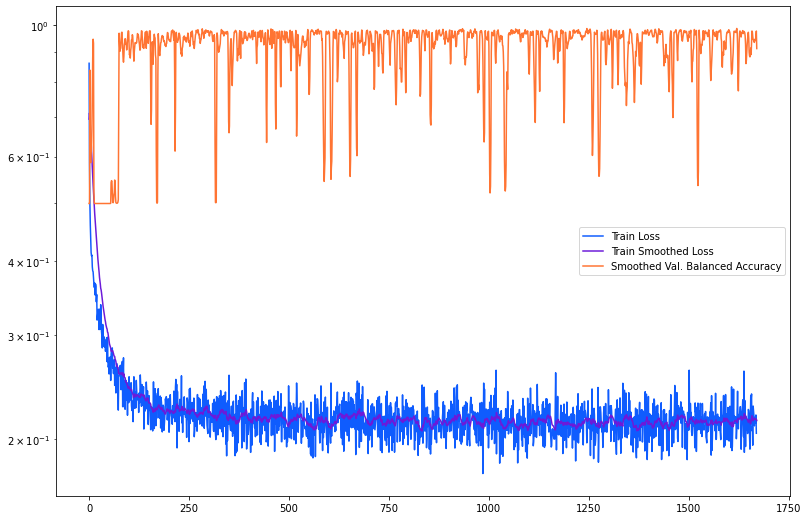

Train Loss: 2.0484E-01
Train Smoothed Loss: 2.1521E-01


In [18]:
batch_size = 1024


model_classifier = Classification_NN(n_features)

model_classifier = model_classifier.to(device)



loss_function = torch.nn.CrossEntropyLoss()
# Hiperparametros
learning_rate = 1e-2
num_epochs = 5

optimizer = torch.optim.Adam(model_classifier.parameters(), lr=learning_rate, weight_decay=1e-5)



[exponential_decay_loss,exponential_balanced_accuracy,list_loss] = train(model_classifier, optimizer, loss_function, num_epochs, batch_size, trainX_autoencoder, trainY, valX_autoencoder, valY)

In [19]:
prob_val = model_classifier(valX_autoencoder)
prob_val = prob_val[:,1]
prob_val = prob_val.cpu().data.numpy()

prob_test = model_classifier(testX_autoencoder)
prob_test = prob_test[:,1]
prob_test = prob_test.cpu().data.numpy()

In [20]:
val_pred = prob_test>=0.5

test_pred = prob_test>=0.5

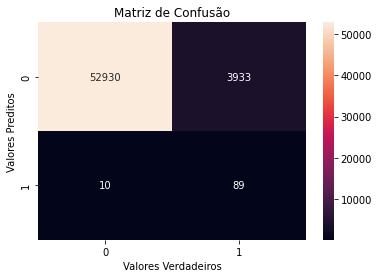

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test.reshape(-1),test_pred.reshape(-1),labels=[0.,1.]),annot=True,fmt='d')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

## Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências: 

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)



### G-Mean

O método G-Mean encontra a limiar maximizando a média geométrica entre a taxa de verdadeiros positivos e a taxa de verdadeiros negativos.

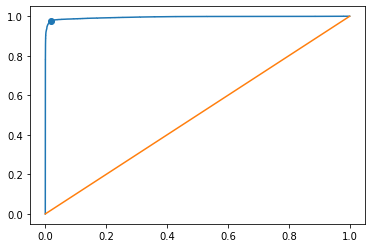

Best Threshold: 1.5163
Area Under the Curve: 0.9951


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,prob_val)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [23]:
y_val_pred_gmean = (prob_val>=threshold)


y_test_pred_gmean = (prob_test>=threshold)

**************Dados de Validação**************

F-beta score: 0.9765 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.975279,0.982431,0.978842,56863.000000
1.0,0.982302,0.975098,0.978687,56863.000000
accuracy,0.978765,0.978765,0.978765,0.978765
macro avg,0.978790,0.978765,0.978764,113726.000000
weighted avg,0.978790,0.978765,0.978764,113726.000000


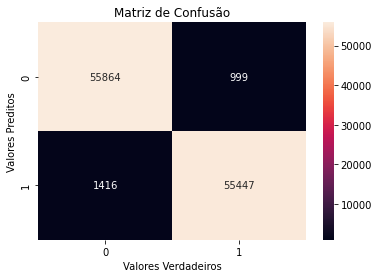

In [24]:
from sklearn.metrics import classification_report
# Utilizando as métricas Fbeta, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")
beta = 2

print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.2902 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999785,0.982132,0.990880,56863.000000
1.0,0.078876,0.878788,0.144759,99.000000
accuracy,0.981953,0.981953,0.981953,0.981953
macro avg,0.539330,0.930460,0.567819,56962.000000
weighted avg,0.998185,0.981953,0.989410,56962.000000


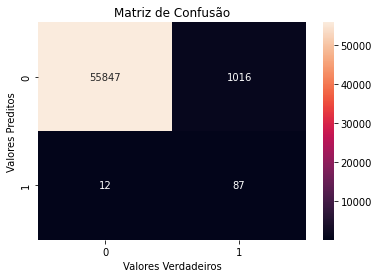

In [25]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### $F_{\beta}$

O método $F_{\beta}$ encontra a limiar maximizando a quantidade $F_{\beta}$.

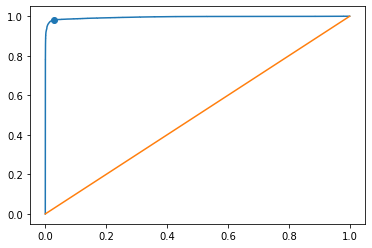

Best Threshold: 1.1451
Area Under the Curve: 0.9951


In [26]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,prob_val)
x = [0,1]

n_thresholds = 50
np.random.seed(42)
random_thresholds = np.random.rand(n_thresholds)*(prob_val.max() - prob_val.min()) + prob_val.min()
np.random.seed(None)

# Neste caso vamos maximizar o f-beta com beta = 2
beta = 2
fbeta_scores = np.zeros((n_thresholds))
for j in range(n_thresholds):
  y_val_pred = (prob_val>=random_thresholds[j])
  fbeta_scores[j] = fbeta_score(y_val,y_val_pred,beta=beta)


# Encontrando o limiar com maior valor de fbeta
j_max = fbeta_scores.argmax()

threshold = random_thresholds[j_max]


y_val_pred = (prob_val>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [27]:
y_val_pred_fbeta = (prob_val>=threshold)


y_test_pred_fbeta = (prob_test>=threshold)

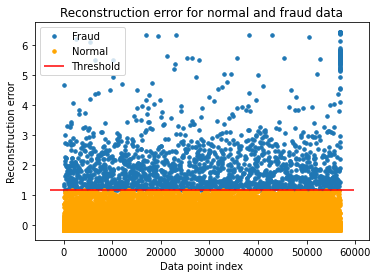

In [28]:
fig, ax = plt.subplots()
index = np.arange(0,test_size)
ax.plot(index[y_test_pred_fbeta == 1], prob_test[y_test_pred_fbeta == 1], marker='o', ms=3.5, linestyle='', label='Fraud')
ax.plot(index[y_test_pred_fbeta == 0], prob_test[y_test_pred_fbeta == 0], marker='o', ms=3.5, linestyle='', label='Normal', color='orange')
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

**************Dados de Validação**************

F-beta score: 0.9791 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.980690,0.971739,0.976194,56863.000000
1.0,0.971995,0.980866,0.976410,56863.000000
accuracy,0.976303,0.976303,0.976303,0.976303
macro avg,0.976342,0.976303,0.976302,113726.000000
weighted avg,0.976342,0.976303,0.976302,113726.000000


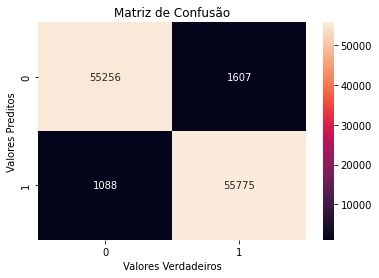

In [29]:
# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.2056 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999783,0.971282,0.985326,56863.000000
1.0,0.050581,0.878788,0.095657,99.000000
accuracy,0.971121,0.971121,0.971121,0.971121
macro avg,0.525182,0.925035,0.540492,56962.000000
weighted avg,0.998133,0.971121,0.983780,56962.000000


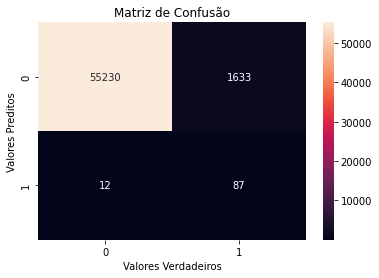

In [30]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### $F_{\beta}$

O método $F_{\beta}$ encontra a limiar maximizando a quantidade $F_{\beta}$.

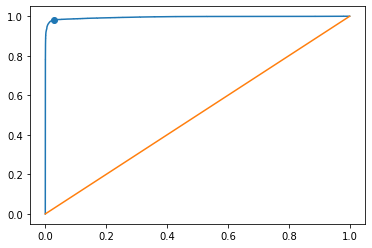

Best Threshold: 1.1451
Area Under the Curve: 0.9951


In [31]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,prob_val)
x = [0,1]

n_thresholds = 50
np.random.seed(42)
random_thresholds = np.random.rand(n_thresholds)*(prob_val.max() - prob_val.min()) + prob_val.min()
np.random.seed(None)

# Neste caso vamos maximizar o f-beta com beta = 2
beta = 2
fbeta_scores = np.zeros((n_thresholds))
for j in range(n_thresholds):
  y_val_pred = (prob_val>=random_thresholds[j]).astype(float)
  fbeta_scores[j] = fbeta_score(y_val,y_val_pred,beta=beta)

j_max = fbeta_scores.argmax()


threshold = random_thresholds[j_max]


y_val_pred = (prob_val>=threshold).astype(float)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)



plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [32]:
y_val_pred_fbeta = (prob_val>=threshold).astype(float)


y_test_pred_fbeta = (prob_test>=threshold).astype(float)

**************Dados de Validação**************

F-beta score: 0.9791 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.980690,0.971739,0.976194,56863.000000
1.0,0.971995,0.980866,0.976410,56863.000000
accuracy,0.976303,0.976303,0.976303,0.976303
macro avg,0.976342,0.976303,0.976302,113726.000000
weighted avg,0.976342,0.976303,0.976302,113726.000000


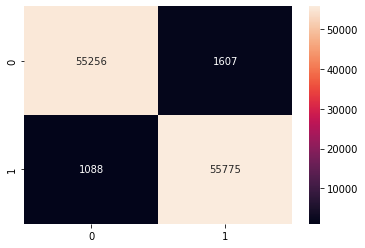

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
plt.show()

**************Dados de Teste**************

F-beta score: 0.2056 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999783,0.971282,0.985326,56863.000000
1.0,0.050581,0.878788,0.095657,99.000000
accuracy,0.971121,0.971121,0.971121,0.971121
macro avg,0.525182,0.925035,0.540492,56962.000000
weighted avg,0.998133,0.971121,0.983780,56962.000000


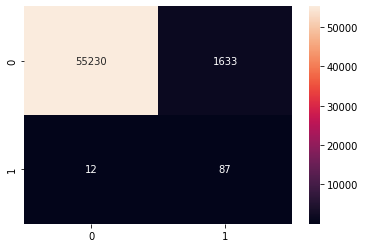

In [34]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
plt.show()

In [35]:
PATH = 'classifier.ptc'
final_model = model_classifier.to('cpu')
torch.save(final_model.state_dict(), PATH)

In [36]:
model = model.to(device)